In [ ]:
% (C) Copyright 2020-2025 Murilo Marques Marinho (murilomarinho@ieee.org)
%
%     This file is licensed in the terms of the
%     Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)
%     license.
%
% Derivative work of:
% https://github.com/dqrobotics/learning-dqrobotics-in-matlab/tree/master/robotic_manipulators
% Contributors to this file:
%     Murilo Marques Marinho (murilomarinho@ieee.org)
clear all;
close all;

<a name="T_00CD409F"></a>
# <span style="color:rgb(213,80,0)">Robot Control Basics using DQ Robotics - Part 2</span>
<a name="beginToc"></a>
## Table of Contents
[Robot Control Basics using DQ Robotics - Part 2](#T_00CD409F)

&emsp;[Introduction](#H_8AFFA90E)

&emsp;[Notation](#H_D4ECB91A)

&emsp;[Problem Definition](#H_C7A69651)

&emsp;[Modeling serial robots using Denavit-Hartenberg Parameters](#H_08B34616)

&emsp;&emsp;[Forward Kinematic Model using DH parameters](#H_8AC9B033)

&emsp;&emsp;&emsp;[DQ Robotics Example](#H_AA707DEE)

&emsp;&emsp;[Differential Kinematics Model using DH parameters](#H_20390A66)

&emsp;&emsp;&emsp;[Pose Jacobian](#H_254642B8)

&emsp;&emsp;&emsp;[Rotation Jacobian](#H_076EF171)

&emsp;&emsp;&emsp;[Translation Jacobian](#H_2FEB9F8A)

&emsp;&emsp;&emsp;[DQ Robotics Example](#H_7BB8E5F4)

&emsp;[Task-space position control ](#H_A9E447B5)

&emsp;&emsp;[Pseudo-Inverse Controller](#H_D4172D0F)

&emsp;&emsp;&emsp;[Preliminaries](#H_2A5E7AB7)

&emsp;&emsp;&emsp;[Translation Controller](#H_FB3C3DFC)

&emsp;&emsp;&emsp;[Rotation Controller](#H_D4B2C20F)

&emsp;&emsp;&emsp;[Pose Controller](#H_53BC575B)

[Homework](#T_6D33E10B)

<a name="endToc"></a>
<a name="H_8AFFA90E"></a>
## Introduction

In the last lesson, I introduced you to the basics of kinematic modeling and kinematic control using a 1-DoF planar robot. The main point of that lesson was to teach you how to develop your robots from scratch, if needed.


Nonetheless, the DQ Robotics library has many of those functionalities built-in. In this lesson, you will learn how to model serial manipulators using the Denavit-Hartenberg parameters and how to calculate important Jacobians using DQ Robotics. You will also learn how to create a basic kinematic controller using DQ Robotics.

<a name="H_D4ECB91A"></a>
## Notation

Keep these in mind (we will also use this notation when writting papers to conferences and journals):

-  $h\in \mathbb{H}$ : a quaternion. (Bold-face, lowercase character)
-  $\underline{h} \in \mathcal{H}$ : a dual quaternion. (Bold-face, underlined, lowercase character)
-  $p,t,\cdots \in {\mathbb{H}}_p$ : pure quaternions. They represent points, positions, and translations. They are quaternions for which $\textrm{Re}\left(h\right)=0$ .
-  $r\in {\mathbb{S}}^3$ : unit quaternions. They represent orientations and rotations. They are quaternions for which $||h||=1$ .
-  $\underline{x} \in$ $\underline{\mathcal{S}}$ : unit dual quaternions. They represent poses and pose transformations. They are dual quaternions for which $||h||=1$ .
-  $\underline{l} \in {\mathcal{H}}_p \cap$ $\underline{{\mathcal{S}}}$ : a Plücker line.
-  $\underline{{{\pi }}} \in \left\lbrace P\left(\underline{{{\pi }}} \right)\in {\mathbb{H}}_p \right\rbrace \cap \underline{{\mathcal{S}}}$ : a plane.
<a name="H_C7A69651"></a>
## Problem Definition
<p style="text-align:left">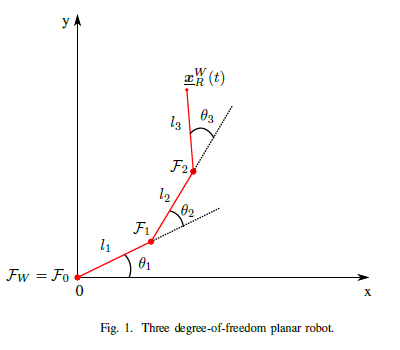</p>


1.  Let the robot $R$ be a 3-DoF planar robot, as drawn in Fig.1.
2. Let ${\mathcal{F}}_W$ be the world-reference frame.
3. Let ${\underline{x} }_R^W (t)\triangleq {\underline{x} }_R$ $\in$ $\underline{\mathcal{S}}$ represent the pose of the *end effector*.
4. Let $R$ be composed of three rotational joints that rotates about their z-axis, composed in the joint-space vector $q\left(t\right)\triangleq q={\left\lbrack \theta_1 ~\theta_2 ~\theta_3 \right\rbrack }^T$ with $\theta_1 \left(t\right)\triangleq \theta_1 ,\theta_2 \left(t\right)\triangleq \theta_2 ,\theta_3 \left(t\right)\triangleq \theta_3 \in \mathbb{R}$ . The rotation of the reference frames of each joint coincide with the rotation of ${\mathcal{F}}_W$ when $\theta_1 =\theta_2 =\theta_3 =0$ . The length of the links are $l_1 ,l_2 ,l_3 \in$ ${\mathbb{R}}^+ -\lbrace 0\rbrace$ .
5. Consider that we can freely control the joint vector $q$ .

Problems:

1.  Obtain the (pose) foward kinematic model of the robot $R$ using a set of DH parameters.
2. Obtain the pose Jacobian, rotation Jacobian, and translation Jacobian of $R$ .
3. Using 1. and 2., design a closed-loop pose controller, rotation controller, and translation controller.
<a name="H_08B34616"></a>
## Modeling serial robots using Denavit-Hartenberg Parameters

In the last lesson, you modelled a 2-DoF planar robot. As the number of DoF and the complexity of the robots increase, modeling them requires a more general, systematic, and scalable strategy. In this lesson we will show how serial manipulators are modeled using the Denavit-Hartenberg (DH) parameters. This is the standard methodology used in DQ robotics for modeling serial robots.

<a name="H_8AC9B033"></a>
### Forward Kinematic Model using DH parameters

For robots in 3D space, obtaining the robot's pose transformation is the most generic form of FKM for the end effector. When using unit dual quaternions, retrieving the rotation, translation, etc from the pose is quite straighforward. So let us obtain the pose FKM of the robot $R$ using the DH parameters.


Before going into detail about the DH parameters, let ${\underline{x} }_0^W \in \underline{{\mathcal{S}}}$ be the reference frame at the base of the robot. For convenience, it can coincide with the reference frame of the first joint of the robot.


The first joint enacts a pose transformation from the reference frame of the first joint to the reference frame of the second joint given by


$${<u>x</u> }_1^0 \left(\theta_1 \right)\triangleq {<u>x</u> }_1^0 \in \underline{{\mathcal{S}}}$$

that depends on the joint value of the first joint.


Given that the 3-DoF planar robot has three joints, the robot can be modeled with three consecutive transformations


$${<u>x</u> }_R ={<u>x</u> }_1^0 {<u>x</u> }_2^1 {<u>x</u> }_3^2 ,$$

where ${\underline{x} }_2^1 \left(\theta_2 \right)\triangleq {\underline{x} }_2^1 \in \underline{{\mathcal{S}}}$ and ${\underline{x} }_3^2 \left(\theta_3 \right)\triangleq {\underline{x} }_3^2 \in \underline{{\mathcal{S}}}$ . This sequence of transformation is a methodology that can be used for a serial manipulator with any number of joints.


The DH parameters provide a systematic way to calculate each individual joint transformation of any n-DoF serial manipulator.  Each joint transformation, ${\underline{x} }_i^{i-1} \left(\theta_i \right)\triangleq {\underline{x} }_i^{i-1} \in \underline{{\mathcal{S}}}$ , with $i=1,2,3\ldotp \ldotp \ldotp n$ is composed of four intermediate transformations, as follows


$${<u>x</u> }_i^{i-1} \triangleq {<u>x</u> }_{i^{\prime } }^i \left(\theta_i \right){<u>x</u> }_{i^{\prime \prime } }^{i^{\prime } } \left(d_i \right){<u>x</u> }_{i^{\prime \prime \prime } }^{i^{\prime \prime } } \left(a_i \right){<u>x</u> }_i^{i^{\prime \prime \prime } } \left(\alpha_i \right),$$

where the DH parameters, for each joint, are $\theta_i ,d_i ,a_i ,\alpha_i \in \mathbb{R}$ . Each of those parameters is related to one transformation. The first is the rotation of $\theta_i$ about the z-axis of frame ${\mathcal{F}}_{i-1}$


$${<u>x</u> }_{i^{\prime } }^{i-1} \left(\theta_i \right)=\cos \left(\frac{\theta_i }{2}\right)+\hat{k} \sin \left(\frac{\theta_i }{2}\right),$$

the second is a translation of $d_i$ about the z-axis of frame ${\mathcal{F}}_{i^{\prime } }$ ,


$${<u>x</u> }_{i^{\prime \prime } }^{i^{\prime } } \left(d_i \right)=1+\varepsilon \frac{1}{2}\hat{k} d_i ,$$

the third is the translation of $a_i$ about the x-axis of frame ${\mathcal{F}}_{i^{\prime \prime } }$ ,


$${<u>x</u> }_{i^{\prime \prime \prime } }^{i^{\prime \prime } } \left(a_i \right)=1+\varepsilon \frac{1}{2}\hat{\imath} a_i ,$$

the fourth, and last, is the rotation of $\alpha_i$ about the x-axis of frame ${\mathcal{F}}_{i^{\prime \prime \prime } }$


$${<u>x</u> }_i^{i^{\prime \prime \prime } } \left(\alpha_i \right)=\cos \left(\frac{\alpha_i }{2}\right)+\hat{\imath} \sin \left(\frac{\alpha_i }{2}\right).$$

Back to our example, the following table summarizes the DH parameters of the 3-DoF planar robot.

<p style="text-align:left">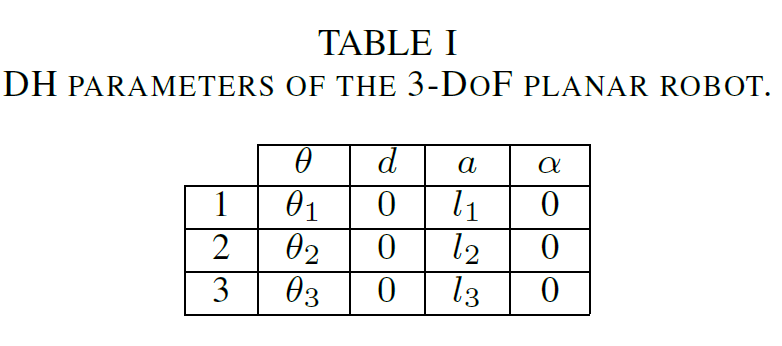</p>

<a name="H_AA707DEE"></a>
#### DQ Robotics Example

Let us create a class representing the 3-DoF planar robot using DH parameters. The good news is that most of the hard work is handled by DQ Robotics, using the following class


In [2]:
help DQ_SerialManipulatorDH

  Concrete class that extends the DQ_SerialManipulator using the
  Denavit-Hartenberg parameters (DH)
 
  Usage: robot = DQ_SerialManipulatorDH(A)
  - 'A' is a 4 x n matrix containing the Denavit-Hartenberg parameters
    (n is the number of links)
     A = [theta1 ... thetan;
             d1  ...   dn;
             a1  ...   an;
          alpha1 ... alphan;
          type1  ... typen]
  where type is the actuation type, either DQ_SerialManipulatorDH.JOINT_ROTATIONAL
  or DQ_SerialManipulatorDH.JOINT_PRISMATIC
  - The only accepted convention in this subclass is the 'standard' DH
  convention.
 
  If the joint is of type JOINT_ROTATIONAL, then the first row of A will
  have the joint offsets. If the joint is of type JOINT_PRISMATIC, then the
  second row of A will have the joints offsets.
 
  DQ_SerialManipulatorDH Methods (Concrete):
        get_dim_configuration_space - Return the dimension of the configuration space.
        fkm - Compute the forward kinematics while taking into acc


Let us represent our robot in the following way, for $l_1 =l_2 =l_3 =1$ .

<pre>
classdef ThreeDofPlanarRobotDH
    %ThreeDofPlanarRobot regarding all methods related to the 3-DoF planar robot

    methods (Static)
        function ret = kinematics()
            %kinematics returns the kinematics of the ThreeDoFPlanarRobot as DQ_SerialManipulatorDH
            DH_theta=  [0, 0, 0];
            DH_d =     [0, 0, 0];
            DH_a =     [1, 1, 1];
            DH_alpha = [0, 0, 0];
            DH_type = repmat(DQ_SerialManipulatorDH.JOINT_ROTATIONAL,1,3);
            DH_matrix = [DH_theta;
                DH_d;
                DH_a;
                DH_alpha;
                DH_type];

            ret = DQ_SerialManipulatorDH(DH_matrix,'standard');
            ret.name = "3 DoF Planar Robot";
        end
    end
end
</pre>

Note that we use


In [3]:
DQ_SerialManipulatorDH.JOINT_ROTATIONAL;


to define a rotational joint, so we do not explicilty define $\theta_1 ,\theta_2 ,\theta_3$ in our model.


To calculate the forward kinematics model and plot the robot model, we can simply call the methods already available in the class, as follows



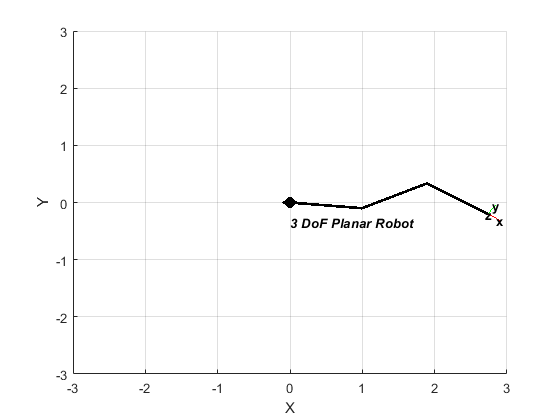

In [4]:
clear all;
close all;

% Initial joint values [rad]
theta1 = -0.1;
theta2 = 0.55;
theta3 = -1.02;

% Joint vector
q = [theta1 theta2 theta3];

% Instantiate the robot kinematics
three_dof_planar_robot = ThreeDofPlanarRobotDH.kinematics();

% Plot the robot in the xy-plane
three_dof_planar_robot.plot(q);

In [5]:

% Get the fkm, based on theta
x_r = three_dof_planar_robot.fkm(q);


For more details about the methods, check the documentation of the class using


In [6]:
help DQ_SerialManipulatorDH.fkm

    fkm(q) calculates the forward kinematic model and
    returns the dual quaternion corresponding to the
    end-effector pose. This function takes into account the
    displacement due to the base's and effector's poses.
 
    'q' is the vector of joint variables
    'to_ith_link' defines up to which link the fkm will be
    calculated. If to_ith_link corresponds to the last link,
    the method DOES NOT take into account the transformation
    given by set_effector. If you want to take into account
    that transformation, use fkm(q) instead.

In [7]:
help DQ_SerialManipulatorDH.plot

  plot(robot,q,options) plots the robot of type DQ_kinematics.
  q is the vector of joint configurations
  options is an optional argument that has variable size and accept any
  number of the following pairs:
 
   'workspace', W          size of robot 3D workspace, where
                           W = [xmn, xmx ymn ymx zmn zmx]
   'cylinder', C           color for joint cylinders, C=[r g b]
   'scale', scale          annotation scale factor
   'base'|'nobase'         controls display of base plane
   'wrist'|'nowrist'       controls display of wrist
   'name'|'noname'         display the robot's name
   'xyz'|'noa'             wrist axis label
   'joints'|'nojoints'     controls display of joints
 
  The graphical robot object holds a copy of the robot object and
  the graphical element is tagged with the robot's name (.name property).
 
  1) Figure behavior:
 
  If no robot of this name is currently displayed then a robot will
  be drawn in the current figure.  If hold is enabled (ho

<a name="H_20390A66"></a>
### Differential Kinematics Model using DH parameters

Similar to how we calculated the the DKM in the last lesson, the DKM can be calculated for any set of DH parameters.

<a name="H_254642B8"></a>
#### Pose Jacobian

Using the FKM, we find


$${\textrm{vec}}_8 \left({\dot{<u>x</u> } }_R \right)=\frac{\partial \left({\textrm{vec}}_8 \left({<u>x</u> }_R \right)\right)}{\partial q}\dot{q} ,$$

where $J_{{\underline{x} }} \triangleq \frac{\partial \left({\textrm{vec}}_8 \left({\underline{x} }_R \right)\right)}{\partial q}$ is the pose Jacobian. We do not need to worry about the details of how to calculate this for now. The details of how to calculate the Jacobian for any serial manipulator are described from Page 38 of


ADORNO, B. V., Two-arm manipulation: from manipulators to enhanced human-robot collaboration [*Contribution à la manipulation à deux bras : des manipulateurs à la collaboration homme-robot*], Université Montpellier 2, Montpellier, France, 2011. ([pdf](https://adorno.eng.ufmg.br/publications/phd_thesis_final_version.pdf))

<a name="H_076EF171"></a>
#### Rotation Jacobian

The goal of this section is to find the rotation Jacobian, $J_r$ , so that the following relation holds


$${\textrm{vec}}_4 \left({\dot{r} }_R \right)=J_r \dot{q} .$$

The rotation Jacobian is useful to control the rotation of the end effector and can be used to calculate many other Jacobians.


We can conveniently find the rotation Jacobian using the pose Jacobian. To do so, remember that the robot's end-effector pose can be decomposed as follows


$${<u>x</u> }_R =r_R +\frac{1}{2}\varepsilon t_R r_R .$$

That means that the first-order time-derivative is


$${\textrm{vec}}_8 \left({\dot{<u>x</u> } }_R \right)={\textrm{vec}}_8 \left(P\left({\dot{<u>x</u> } }_R \right)\right)+{\textrm{vec}}_8 \left(D\left({\dot{<u>x</u> } }_R \right)\right)$$

that can be re-written as


$$J_{{<u>x</u> }} \dot{q} =\left\lbrack \begin{array}{c} J_{P\left({<u>x</u> }\right)} \\ 0 \end{array}\right\rbrack \dot{q} +\left\lbrack \begin{array}{c} 0\\ J_{D\left({<u>x</u> }\right)}  \end{array}\right\rbrack \dot{q}$$

which means that the pose Jacobian can be decomposed as


$$J_{{<u>x</u> }} \dot{q} =\left\lbrack \begin{array}{c} J_{P\left({<u>x</u> }\right)} \\ J_{D\left({<u>x</u> }\right)}  \end{array}\right\rbrack \dot{q} .$$

Notice that


$$J_{P\left({<u>x</u> }\right)} \dot{q} ={\textrm{vec}}_4 \left({\dot{r} }_R \right)$$

$$J_{P\left({<u>x</u> }\right)} \dot{q} =J_r \dot{q}$$

which means that the rotation Jacobian is  $J_r =J_{P\left({\underline{x} }\right)}$ . That is, the rotational Jacobian is composed of the first four rows of the pose Jacobian.

<a name="H_2FEB9F8A"></a>
#### Translation Jacobian

The goal of this section is to find the translation Jacobian, $J_t$ , so that the following relation holds


$${\textrm{vec}}_4 \left({\dot{t} }_R \right)=J_t \dot{q}$$

The translation Jacobian is useful to control the translation of the end effector and can be used to calculate many other Jacobians. We can conveniently find the translation Jacobian using the pose Jacobian and the end-effector's pose.


We start from the translation relation


$$t_R =\textrm{translation}\left({<u>x</u> }_R \right)=2D\left({<u>x</u> }_R \right)P{\left({<u>x</u> }_R \right)}^*$$

$${\dot{t} }_R =2\left\lbrack D\left({\dot{<u>x</u> } }_R \right)P{\left({<u>x</u> }_R \right)}^* +D\left({<u>x</u> }_R \right)P{\left({\dot{<u>x</u> } }_R \right)}^* \right\rbrack$$

$${\textrm{vec}}_4 \left({\dot{t} }_R \right)=2\left\lbrack \overset{-}{\underset{4}{H}} \left(P{\left({<u>x</u> }_R \right)}^* \right)J_{D\left({<u>x</u> }\right)} +\overset{+}{\underset{4}{H}} \left(D\left({<u>x</u> }_R \right)\right)C_4 J_{P\left({<u>x</u> }\right)} \right\rbrack \dot{q}$$

hence


$$J_t =2\left\lbrack \overset{-}{\underset{4}{H}} \left(P{\left({<u>x</u> }_R \right)}^* \right)J_{D\left({<u>x</u> }\right)} +\overset{+}{\underset{4}{H}} \left(D\left({<u>x</u> }_R \right)\right)C_4 J_{P\left({<u>x</u> }\right)} \right\rbrack .$$
<a name="H_7BB8E5F4"></a>
#### DQ Robotics Example

The pose Jacobian can be computed using the DQ_SerialManipulatorDH class as follows.


In [8]:
% Get the pose Jacobian
Jx = three_dof_planar_robot.pose_jacobian(q)

Jx = 8x3    
   0.140578725647647   0.140578725647647   0.140578725647647
                   0                   0                   0
                   0                   0                   0
   0.479830826328701   0.479830826328701   0.479830826328701
                   0                   0                   0
  -0.143344059467663  -0.051370792703642   0.283922785115310
   0.671107164172490   0.179639038857374  -0.191276337843790
                   0                   0                   0


The rotation Jacobian and translation Jacobian can be calculated using methods of its DQ_Kinematics superclass. For instance, the rotation Jacobian can be obtained as


In [9]:
% Get the rotation Jacobian, based on the pose Jacobian
Jr = three_dof_planar_robot.rotation_jacobian(Jx)

Jr = 4x3    
   0.140578725647647   0.140578725647647   0.140578725647647
                   0                   0                   0
                   0                   0                   0
   0.479830826328701   0.479830826328701   0.479830826328701


and the translation Jacobian can be obtained as


In [10]:
% Get the end-effector's pose
x = three_dof_planar_robot.fkm(q);
% Get the translation Jacobian
Jt = three_dof_planar_robot.translation_jacobian(Jx,x)

Jt = 4x3    
                   0                   0                   0
   0.204499931269567   0.104666514622739   0.539632048733969
   2.737352242792972   1.742348077514946   0.841900975162269
                   0                   0                   0

<a name="H_A9E447B5"></a>
## Task-space position control

In the last lesson you were introduced to the basics of robot control using the inverse differential kinematics model.


Instead of building the controller from scratch, you can use controllers already available in DQ Robotics.

<a name="H_D4172D0F"></a>
### Pseudo-Inverse Controller

In the last lesson, we implemented a simple pseudo-inverse-based kinematic controller. Let us revisit this topic using DQ Robotics.


Let us start by cleaning up the workspace and write the control loop from scratch.

<a name="H_2A5E7AB7"></a>
#### Preliminaries

Let us start with the initial conditions of the problem.


First, clean the workspace.


In [11]:
clear all;
close all;
include_namespace_dq


Define the sampling time and how many seconds of control we will simulate.


In [12]:
% Sampling time [s]
tau = 0.01;
% Simulation time [s]
final_time = 1;


Define the initial robot posture.


In [13]:
% Initial joint values [rad]
theta1 = -0.4;
theta2 = 1.71;
theta3 = 0.85;
% Arrange the joint values in a column vector
q_init = [theta1 theta2 theta3]';

<a name="H_C50E6DDF"></a>

Define the desired translation


In [14]:
% Desired translation components [m]
tx = 1.25;
ty = 1.25;
% Desired translation
td = tx*i_ + ty*j_;


then, the desired rotation.


In [15]:
% Desired rotation component [rad]
gamma = 0.49;
% Desired rotation
rd = cos(gamma/2.0) + k_*sin(gamma/2.0);


The desired pose will then be


In [16]:
% Desired pose
xd = rd + 0.5*E_*td*rd;


We then instantiate the robot kinematics, as follows.


In [17]:
% Create robot
three_dof_planar_robot = ThreeDofPlanarRobotDH.kinematics();

<a name="H_FB3C3DFC"></a>
#### Translation Controller

The basic syntax to instantiate a translation controller is as follows.


The robot will align the end-effector translation with the desired translation. The rotation is not controlled.



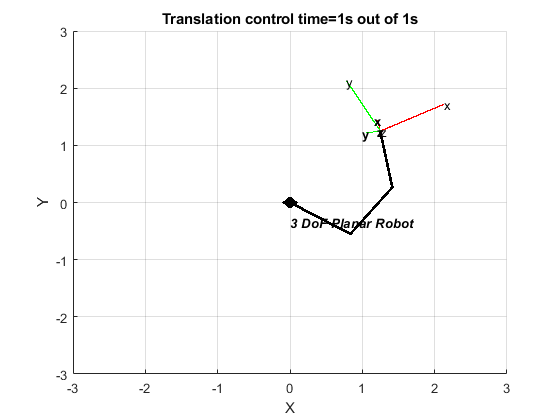

In [18]:
% Instanteate the controller
translation_controller = DQ_PseudoinverseController(three_dof_planar_robot);
translation_controller.set_control_objective(ControlObjective.Translation);
translation_controller.set_gain(5.0);
translation_controller.set_damping(0); % Damping was not explained yet, set it as 0 to use pinv()

% Translation controller loop.
q = q_init;
for time=0:tau:final_time
    % Get the next control signal [rad/s]
    u = translation_controller.compute_setpoint_control_signal(q,vec4(td));

    % Move the robot
    q = q + u*tau;


    % Plot
    % Plot the robot
    three_dof_planar_robot.plot(q);
    title(['Translation control' ' time=' num2str(time) 's out of ' num2str(final_time) 's'])
    % Plot the desired pose
    hold on
    plot(xd);
    hold off
    % [For animations only]
    drawnow; % [For animations only] Ask MATLAB to draw the plot now
end

In [19]:
% Rerun controller


<a name="H_D4B2C20F"></a>
#### Rotation Controller

The basic syntax to instantiate a rotation controller is as follows.


The robot will align the end-effector rotation with the desired rotation. The translation is not controlled.



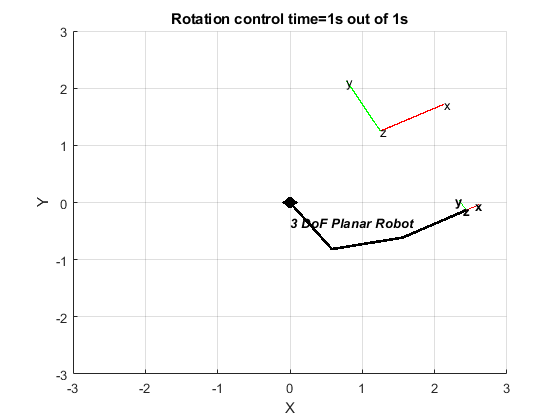

In [20]:
% Instantiate the controller
translation_controller = DQ_PseudoinverseController(three_dof_planar_robot);
translation_controller.set_control_objective(ControlObjective.Rotation);
translation_controller.set_gain(5.0);
translation_controller.set_damping(0); % Damping was not explained yet, set it as 0 to use pinv()

% Rotation controller loop.
q = q_init;
for time=0:tau:final_time
    % Get the next control signal [rad/s]
    u = translation_controller.compute_setpoint_control_signal(q,vec4(rd));

    % Move the robot
    q = q + u*tau;

    % Plot
    % Plot the robot
    three_dof_planar_robot.plot(q);
    title(['Rotation control' ' time=' num2str(time) 's out of ' num2str(final_time) 's'])
    % Plot the desired pose
    hold on
    plot(xd);
    hold off
    % [For animations only]
    drawnow; % [For animations only] Ask MATLAB to draw the plot now
end

In [21]:
% Rerun controller


<a name="H_53BC575B"></a>
#### Pose Controller

The basic syntax to instantiate a pose controller is as follows.


The robot will align the end-effector pose with the desired pose. If the rotation and translation cannot be achieved simulatenously, the robot will balance rotation and translation error, according to the controller definitions.



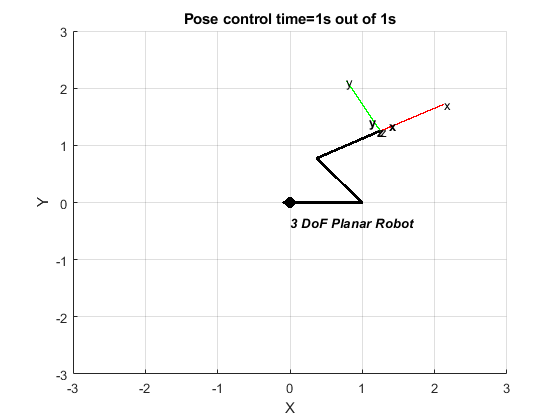

In [22]:
% Instantiate the controller
translation_controller = DQ_PseudoinverseController(three_dof_planar_robot);
translation_controller.set_control_objective(ControlObjective.Pose);
translation_controller.set_gain(5.0);
translation_controller.set_damping(0); % Damping was not explained yet, set it as 0 to use pinv()

% Translation controller loop.
q = q_init;
for time=0:tau:final_time
    % Get the next control signal [rad/s]
    u = translation_controller.compute_setpoint_control_signal(q,vec8(xd));

    % Move the robot
    q = q + u*tau;

    % Plot
    % Plot the robot
    three_dof_planar_robot.plot(q);
    title(['Pose control' ' time=' num2str(time) 's out of ' num2str(final_time) 's'])
    % Plot the desired pose
    hold on
    plot(xd);
    hold off
    % [For animations only]
    drawnow; % [For animations only] Ask MATLAB to draw the plot now
end

In [23]:
% Rerun controller


<a name="T_6D33E10B"></a>
# <span style="color:rgb(213,80,0)">Homework</span>

(1) Following the format of [ThreeDofPlanarRobotDH.m], create a class called [NDofPlanarRobotDH.m] as shown in the figure.

<p style="text-align:left">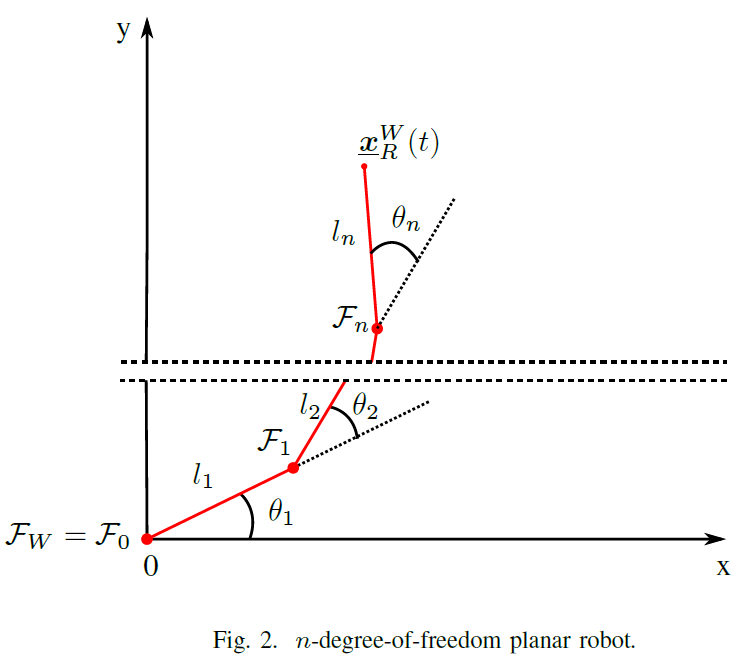</p>


The class must

1.  Consider all lengths of the links as unitary. That is, $l_1 =l_2 =\cdots =l_n =1$ .
2. Have a "kinematics" method that takes the desired number of DoFs as input and returns the corresponding DQ_SerialManipulatorDH instance.

(2) Consider the desired translation $t_d =5\hat{\imath} +2\hat{\jmath}$ , desired rotation $r_d =\cos \left(-\frac{\pi }{8}\right)+\hat{k} \sin \left(-\frac{\pi }{8}\right)$ , and initial posture $\theta_i (0)=\frac{\pi }{8}$ for $i=1...7$ . Use the class you created in (1) to instantiate a 7-DoF planar robot.

1.  create a script called [seven_dof_planar_robot_translation_control.m] that implements a task-space translation controller using a DQ_PseudoinverseController. Control the 7-DoF planar robot to $t_d .$
2. create a script called [seven_dof_planar_robot_rotation_control.m] that implements a task-space rotation controller using a DQ_PseudoinverseController. Control the 7-DoF planar robot to $r_d .$
3. create a script called [seven_dof_planar_robot_pose_control.m] that implements a task-space pose controller using a DQ_PseudoinverseController. Control the 7-DoF planar robot to ${\underline{x} }_d =r_d +\frac{1}{2}\varepsilon t_d r_d$ .
